In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Provide the file paths for the datasets
customers_path = '/content/drive/MyDrive/Datasets/Customers.csv'
products_path = '/content/drive/MyDrive/Datasets/Products.csv'
transactions_path = '/content/drive/MyDrive/Datasets/Transactions.csv'

# Load datasets
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

# Display first few rows of each dataset
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [5]:
# Convert TransactionDate to datetime
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
transactions["Year"] = transactions["TransactionDate"].dt.year

In [6]:
# Check data info
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           -------

In [7]:
# 1. Top-Selling Product Details
top_selling_product_id = transactions["ProductID"].value_counts().idxmax()
top_selling_product_details = products[products["ProductID"] == top_selling_product_id]

<ipython-input-8-69fe0ad29072>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_wise_customers.index, y=region_wise_customers.values, palette="viridis")


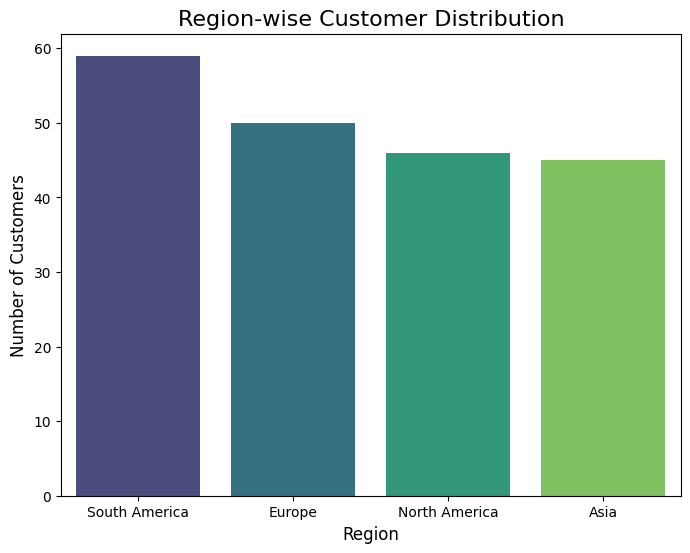

In [8]:
# 2. Region-wise Customer Distribution
region_wise_customers = customers["Region"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_wise_customers.index, y=region_wise_customers.values, palette="viridis")
plt.title("Region-wise Customer Distribution", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

In [9]:
# 3. Best Performing Category by Revenue
merged_data = transactions.merge(products, on="ProductID")
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

In [10]:
# 4. Yearly Revenue Trend
yearly_revenue_trend = transactions.groupby("Year")["TotalValue"].sum()

In [11]:
# 5. Average Revenue Per Transaction
avg_revenue_per_transaction = transactions["TotalValue"].mean()

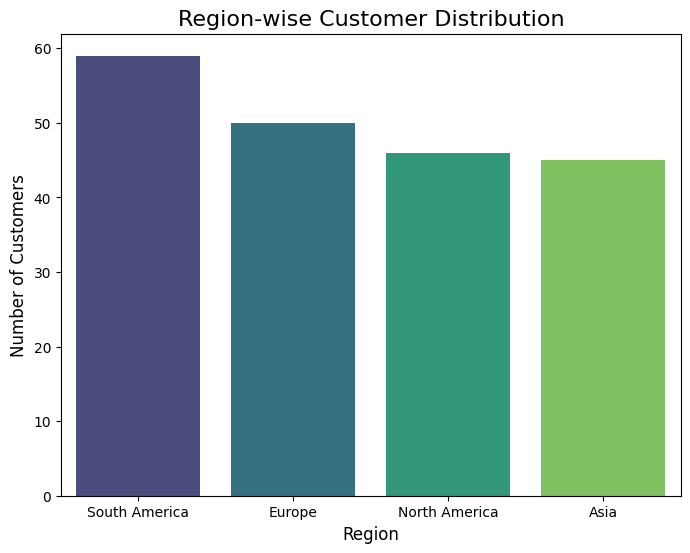

In [12]:
# 1. Bar chart for Region-wise Customer Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=region_wise_customers.index, y=region_wise_customers.values, hue=region_wise_customers.index, dodge=False, palette="viridis", legend=False)
plt.title("Region-wise Customer Distribution", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

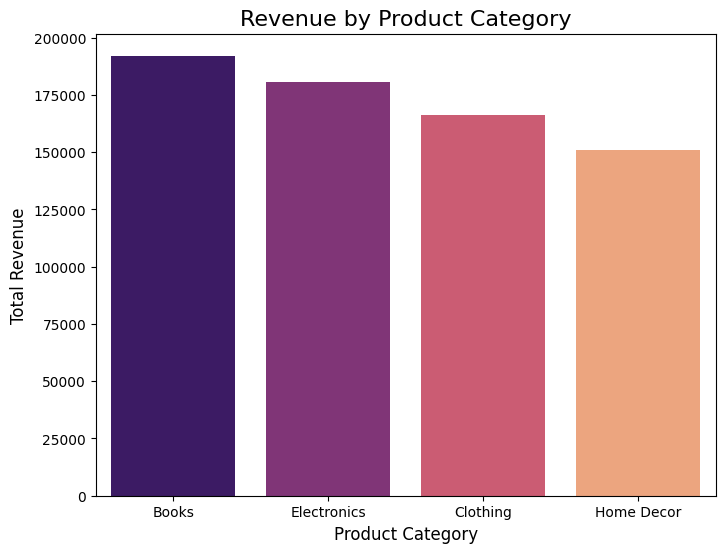

In [13]:
# 2. Bar chart for Revenue by Product Category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, hue=category_revenue.index, dodge=False, palette="magma", legend=False)
plt.title("Revenue by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.show()

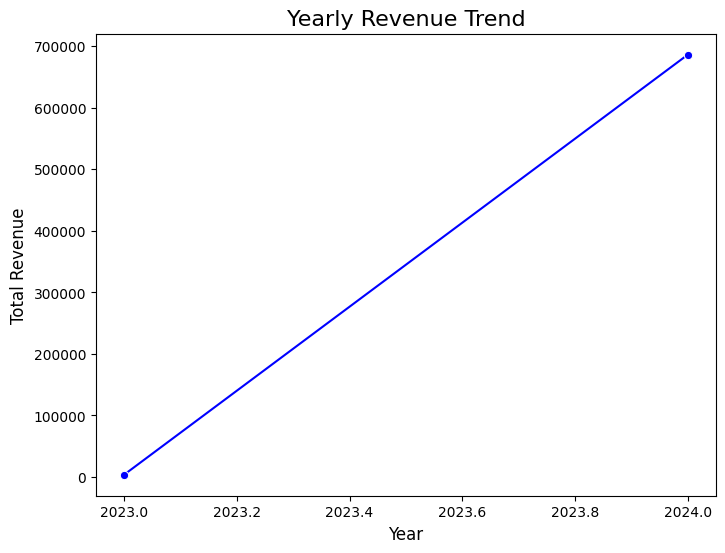

In [14]:
# 3. Line chart for Yearly Revenue Trend
plt.figure(figsize=(8, 6))
sns.lineplot(x=yearly_revenue_trend.index, y=yearly_revenue_trend.values, marker="o", color="blue")
plt.title("Yearly Revenue Trend", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.show()

In [15]:
# 4. Highlight Average Revenue Per Transaction
print(f"Average Revenue Per Transaction: ${avg_revenue_per_transaction:.2f}")

Average Revenue Per Transaction: $690.00


In [16]:
# 5. Top-Selling Product Details
print("\nTop-Selling Product Details:")
print(top_selling_product_details)


Top-Selling Product Details:
   ProductID      ProductName  Category  Price
58      P059  SoundWave Jeans  Clothing  303.2
